# Titanic Data set

## 1- Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2- Load the Data

In [2]:
titanic = pd.read_csv('train.csv')

## 3- EDA

Check to see what the titanic dataset looks like

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check to see whether there are any correlations in the data.

In [4]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Check if there are any missing data and if so roughly how much

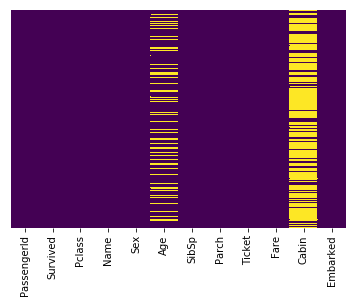

In [5]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
print("Percentage of Age == NaN values: ", 100*np.size(titanic[pd.isnull(titanic['Age'])]['Age'])/np.size(titanic['Age']))
print("Percentage of Age == NaN values: ", 100*np.sum(pd.isnull(titanic['Age']))/np.size(titanic['Age']))
print("Percentage of Age == NaN values: ", 100*(1- titanic['Age'].count()/np.size(titanic['Age'])))

print("Percentage of Cabin == NaN values: ", 100*np.size(titanic[pd.isnull(titanic['Cabin'])]['Cabin'])/np.size(titanic['Cabin']))
print("Percentage of Cabin == NaN values: ", 100*np.sum(pd.isnull(titanic['Cabin']))/np.size(titanic['Cabin']))
print("Percentage of Cabin == NaN values: ", 100*(1- titanic['Cabin'].count()/np.size(titanic['Cabin'])))

Percentage of Age == NaN values:  19.865319865319865
Percentage of Age == NaN values:  19.865319865319865
Percentage of Age == NaN values:  19.865319865319865
Percentage of Cabin == NaN values:  77.10437710437711
Percentage of Cabin == NaN values:  77.10437710437711
Percentage of Cabin == NaN values:  77.1043771043771


Check the proportions of survived and not survived

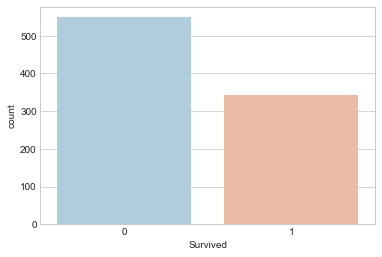

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic,palette='RdBu_r')

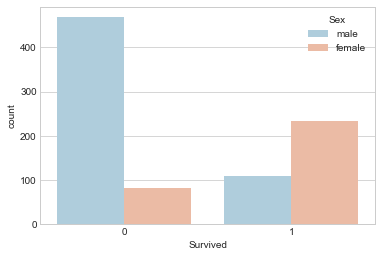

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r')

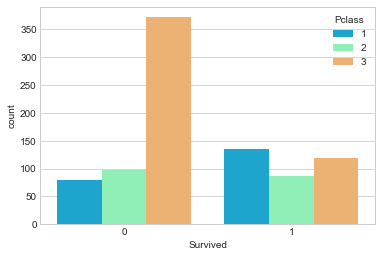

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')

Check the Age distribution

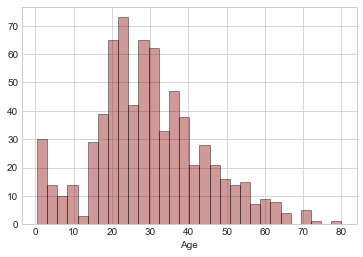

In [10]:
sns.distplot(titanic['Age'].dropna(),kde=False,color='darkred',bins=30,hist_kws=dict(edgecolor='black'))


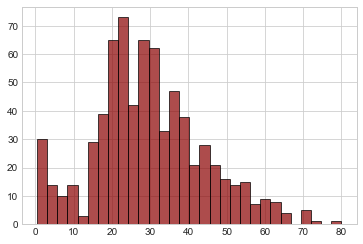

In [11]:
titanic['Age'].hist(bins=30,color='darkred',alpha=0.7, edgecolor = 'black')

Look at the distribution of SibSp

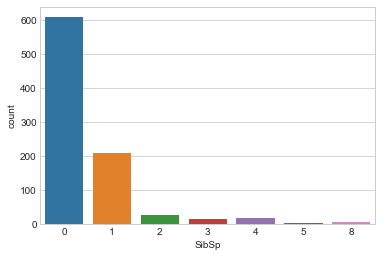

In [12]:
sns.countplot(x='SibSp',data=titanic)

Look at the distribution of Fares

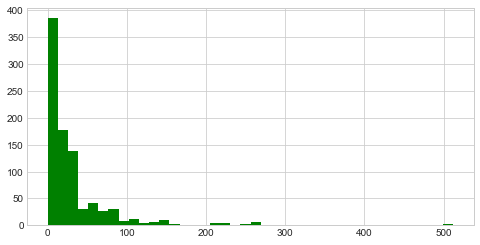

In [13]:
titanic['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [14]:
titanic[['Survived','Parch']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [15]:
titanic[['Survived','SibSp']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [16]:
titanic['TotalPpl'] = titanic['Parch'] + titanic['SibSp']

In [17]:
titanic[['Survived','TotalPpl']].groupby('TotalPpl').mean()

,Survived
TotalPpl,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [18]:
titanic[['Survived','TotalPpl','SibSp']].corr()

,Survived,TotalPpl,SibSp
Survived,1.000000,0.016639,-0.035322
TotalPpl,0.016639,1.000000,0.890712
SibSp,-0.035322,0.890712,1.000000


In [19]:
titanic.drop('TotalPpl',axis=1,inplace=True)

In [74]:
def TrueFalse(p):
    '''A function to null to 0'''
    if(p):
        return 1
    else:
        return 0
    
def getTitleFromTitanic(x):
    for elt in x.split():
        if('.' in elt):
            return elt.replace('.','')
    return ''

def GetFirstCharacter(row):
    '''A function to extract the first letter (lower case) from a string. If string is null then output is an empty string'''
    if(pd.isnull(row) or len(row)==0):
        return 0
    else:
        return ord(row[0].lower())

def CleanTitanicData(df):
    '''A function to clean the titanic dataframe'''
    
    #Sex is either male or female. Create a series which has entries 0 and 1 specifying whether it's one or the other
    sex = pd.get_dummies(df['Sex'],drop_first=True)
    
    #Similar to the sex series
    embark = pd.get_dummies(df['Embarked'],drop_first=True)
    
    #Cabin either exists or doesn't -> 1 or 0
    #Cabin = pd.DataFrame(np.array([TrueFalse(pd.isnull(row)) for row in df['Cabin']]),columns=['Cabin'])
    
    #Get first letter of cabin
    Cabin = df['Cabin'].apply(GetFirstCharacter)
    
    #Get the title from the name
    df['Title'] = df['Name'].apply(getTitleFromTitanic)
    
    df['Title'] = df['Title'].map({'Mr': int(1), 'Mrs': int(2), 'Miss': int(3), 'Master':int(4),'Don':int(5),'Rev':int(6),
        'Mme':int(7),
        'Ms':int(8),'Major':int(9), 'Lady':int(10), 'Sir':int(11), 'Mlle':int(12), 
        'Col':int(13), 'Capt':int(14), 'Countess':int(15),'Jonkheer':int(16), 'Dr':int(17), 'Dona':int(17)})
    
    #Get rid of some columns
    df_temp = df.drop(['Sex','Embarked','Name','Ticket','Cabin'],axis=1,inplace=False)
    
    #Concat the series to the data frame
    df_temp = pd.concat([df_temp,sex,embark,Cabin],axis=1)
    
    return df_temp

def AddTotalPpl(df):
    df_temp = df.copy()
    df_temp['TotalPpl'] = df['Parch'] + df['SibSp']
    return df_temp

As seen above, there is some missing data for Age. Also, the test data may have missing Fare. One way we can cater for this is to fill the missing Age with the mean of the Age for that sex and Pclass

In [75]:
#We will put this block into a function below
t_Fare = pd.DataFrame(CleanTitanicData(titanic).dropna().groupby(['Pclass','male']).mean()['Fare'])
t_Fare = pd.DataFrame(t_Fare.to_records())

t_Age = pd.DataFrame(CleanTitanicData(titanic).dropna().groupby(['Pclass','male']).mean()['Age'])
t_Age = pd.DataFrame(t_Age.to_records())

print(t_Fare)
print(t_Age)

   Pclass  male        Fare
0       1     0  107.946275
1       1     1   71.142781
2       2     0   21.951070
3       2     1   21.113131
4       3     0   15.875369
5       3     1   12.162695
   Pclass  male        Age
0       1     0  34.611765
1       1     1  41.281386
2       2     0  28.722973
3       2     1  30.740707
4       3     0  21.750000
5       3     1  26.507589


In [76]:
def setAge(row,meanAge):
    '''
    This function is intended to be used via the apply() funtion and applies to rows in the format (Age,sex,Pclass).
    This function replaces any null Age with the mean Age of the same sex and Pclass as given in the meanAge argument/dataframe.
    '''
    Age = row[0]
    male = row[1]
    Pclass = row[2]
    if(pd.isnull(Age)):
        return int(t_Age[(t_Age['Pclass'] == Pclass) & (t_Age['male'] == male)]['Age'].iloc[0])
    else:
        return int(Age)

In [77]:
def setFare(row,meanFare):
    '''
    This function is intended to be used via the apply() funtion and applies to rows in the format (Fare,sex,Pclass).
    This function replaces any null Fare with the mean Fare of the same sex and Pclass as given in the meanFare argument/dataframe.
    '''
    Fare = row[0]
    male = row[1]
    Pclass = row[2]
    if(pd.isnull(Age)):
        return int(t_Fare[(t_Fare['Pclass'] == Pclass) & (t_Fare['male'] == male)]['Age'].iloc[0])
    else:
        return int(Fare)

Now we clean the data and fill missing values

In [78]:
def fillTitanicNa(df,fillAge=True,fillFare=True):
    '''
    This function takes a titanic data frame, cleans it and fills in missing Age and Fare values. If it is desired
    that the Age not be filled the fillAge should be set to False. Likewise with fillFare.
    '''
    df_temp = CleanTitanicData(df)
    t_Fare = pd.DataFrame(df_temp.dropna().groupby(['Pclass','male']).mean()['Fare'])
    t_Fare = pd.DataFrame(t_Fare.to_records())

    t_Age = pd.DataFrame(df_temp.dropna().groupby(['Pclass','male']).mean()['Age'])
    t_Age = pd.DataFrame(t_Age.to_records())
    
    if(fillAge == True):
        df_temp['Age'] = df_temp[['Age','S','Pclass']].apply(lambda row: setAge(row,t_Age),axis=1)
    
    if(fillFare == True):
        df_temp['Fare'] = df_temp[['Fare','S','Pclass']].apply(lambda row: setAge(row,t_Fare),axis=1)
        
    if(fillAge == False or fillFare == False):
        df_temp.dropna(inplace = True)
    return df_temp


The data set given for us to do predictions on has a missing 'Fare' and missing 'Age'. So we may as well fill Age and Fare.

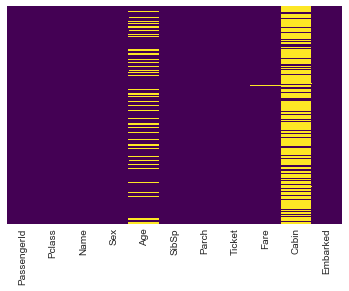

In [79]:
sns.heatmap(pd.read_csv('test.csv').isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [80]:
titanicCleaned = titanic.copy()
titanicCleaned = fillTitanicNa(titanicCleaned,True,True)

titanicCleanedTotPpl = AddTotalPpl(titanicCleaned)

In [81]:
titanicCleaned[['Survived','Title']].groupby('Title').mean()

,Survived
Title,
1,0.156673
2,0.792000
3,0.697802
4,0.575000
5,0.000000
6,0.000000
7,1.000000
8,1.000000
9,0.500000


In [82]:
titanicCleaned.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title,male,Q,S,Cabin
0,1,0,3,22,1,0,7,1,1,0,1,0
1,2,1,1,38,1,0,71,2,0,0,0,99
2,3,1,3,26,0,0,7,3,0,0,1,0
3,4,1,1,35,1,0,53,2,0,0,1,99
4,5,0,3,35,0,0,8,1,1,0,1,0


In [83]:
titanicCleanedTotPpl.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title,male,Q,S,Cabin,TotalPpl
0,1,0,3,22,1,0,7,1,1,0,1,0,1
1,2,1,1,38,1,0,71,2,0,0,0,99,1
2,3,1,3,26,0,0,7,3,0,0,1,0,0
3,4,1,1,35,1,0,53,2,0,0,1,99,1
4,5,0,3,35,0,0,8,1,1,0,1,0,0


Check that there are no missing values

In [84]:
titanicCleaned.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Title          0
male           0
Q              0
S              0
Cabin          0
dtype: int64

In [85]:
titanicCleaned.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title,male,Q,S,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.000000,0.523008,0.381594,31.785634,2.000000,0.647587,0.086420,0.722783,22.769921
std,257.353842,0.486592,0.836071,13.376736,1.102743,0.806057,49.703730,2.064684,0.477990,0.281141,0.447876,41.818251
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,3.000000,1.000000,0.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000,17.000000,1.000000,1.000000,1.000000,116.000000


In [86]:
titanicCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null int64
Title          891 non-null int64
male           891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
Cabin          891 non-null int64
dtypes: int64(9), uint8(3)
memory usage: 65.3 KB


## 4- Prediction

### A- Logistic Regression

Import the necessary libraries

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

Get our training data and our test data for seeing if the model works well

In [88]:
X = titanicCleaned.drop('Survived',axis=1)
y = titanicCleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Fit a logistic regression model to the data

In [89]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
lg.coef_

array([[ 4.21038430e-04, -3.92494311e-01, -2.67265208e-02,
        -2.64230884e-01, -1.17129109e-01,  4.17248928e-03,
         9.85869203e-02, -2.30053926e+00, -2.10952932e-01,
        -3.28832000e-01,  9.61084674e-03]])

In [91]:
lg.intercept_

array([2.22891993])

Now check performance

In [92]:
predictions = lg.predict(X_test)

In [93]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.82      0.85      0.83       157
          1       0.78      0.73      0.75       111

avg / total       0.80      0.80      0.80       268

[[134  23]
 [ 30  81]]
0.8022388059701493


It did ok. Now train with the whole data set

In [94]:
lg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Get the data required for prediction

In [95]:
test = pd.read_csv('test.csv')

Clean and fill the test data the same way we did the train data

In [96]:
titanicTestCleaned = fillTitanicNa(test,True,True)

In [97]:
titanicTestCleaned[titanicTestCleaned['Title'].isnull()]
test[test['PassengerId'] == 1306]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,17


Check that there no data is missing

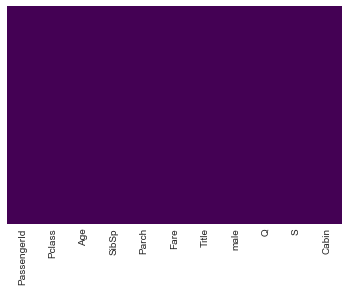

In [98]:
sns.heatmap(titanicTestCleaned.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Make sure we haven't lost any rows

In [99]:
print(titanicTestCleaned.shape)
titanicTestCleaned.head()

(418, 11)


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Title,male,Q,S,Cabin
0,892,3,34,0,0,7,1,1,1,0,0
1,893,3,47,1,0,7,2,0,0,1,0
2,894,2,62,0,0,9,1,1,1,0,0
3,895,3,27,0,0,8,1,1,0,1,0
4,896,3,22,1,1,12,2,0,0,1,0


Now we predict

In [100]:
predictions = lg.predict(titanicTestCleaned)

In [101]:
df_pred = pd.DataFrame(predictions,columns=['Survived'])
df_pred.head()

,Survived
0,0
1,0
2,0
3,0
4,1


We need the data to be in the correct format. Namely, (PassengerId,Survived)

In [102]:
def formatTitanicPredictions(df_pred,test):
    df_FullPred = pd.concat([df_pred,test],axis=1)
    df_FullPred = df_FullPred.dropna()
    df_FullPred['PassengerId'] = df_FullPred['PassengerId'].astype(int)
    df_FullPred = df_FullPred.set_index('PassengerId')
    return df_FullPred

In [103]:
def formatTitanicPredictions2(df_pred,test,original):
    df_FullPred = pd.concat([df_pred,test],axis=1)
    df_FullPred = df_FullPred.dropna()
    df_FullPred['PassengerId'] = original['PassengerId'].astype(int)
    df_FullPred = df_FullPred.set_index('PassengerId')
    return df_FullPred

In [104]:
# df_FullPred = pd.concat([df_pred,test],axis=1)
# df_FullPred = df_FullPred.dropna()
# df_FullPred['PassengerId'] = df_FullPred['PassengerId'].astype(int)
# df_FullPred = df_FullPred.set_index('PassengerId')
df_FullPred = formatTitanicPredictions(df_pred,titanicTestCleaned)

In [105]:
df_FullPred['Survived'].head()

PassengerId
892    0
893    0
894    0
895    0
896    1
Name: Survived, dtype: int64

In [106]:
df_FullPred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Survived    418 non-null int64
Pclass      418 non-null int64
Age         418 non-null int64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null int64
Title       418 non-null int64
male        418 non-null uint8
Q           418 non-null uint8
S           418 non-null uint8
Cabin       418 non-null int64
dtypes: int64(8), uint8(3)
memory usage: 30.6 KB


Output

In [107]:
df_FullPred['Survived'].to_csv('GenderPrediction.csv',header=True)

In [108]:
df_FullPred.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,male,Q,S,Cabin
PassengerId,,,,,,,,,,,
892,0,3,34,0,0,7,1,1,1,0,0
893,0,3,47,1,0,7,2,0,0,1,0
894,0,2,62,0,0,9,1,1,1,0,0
895,0,3,27,0,0,8,1,1,0,1,0
896,1,3,22,1,1,12,2,0,0,1,0


Now let's summarise the above actions to predict and save. Now that we have a function, we can train a linear regression model and pass it to the function

In [109]:
def PredictAndSave(df,lg,path):
    test = df
    titanicTestCleaned = fillTitanicNa(test,True,True)
    predictions = lg.predict(titanicTestCleaned)
    df_pred = pd.DataFrame(predictions,columns=['Survived'])
    df_FullPred = formatTitanicPredictions(df_pred,titanicTestCleaned)
    df_FullPred['Survived'].to_csv(path,header=True)
    return df_FullPred

In [110]:
def PredictAndSave2(df,lg,path,original):
    test = df
    titanicTestCleaned = fillTitanicNa(test,True,True)
    predictions = lg.predict(titanicTestCleaned)
    df_pred = pd.DataFrame(predictions,columns=['Survived'])
    df_FullPred = formatTitanicPredictions2(df_pred,titanicTestCleaned,original)
    df_FullPred['Survived'].to_csv(path,header=True)
    return df_FullPred

In [111]:
test2 = pd.read_csv('test.csv')

In [112]:
PredictAndSave(test2,lg,'GenderPrediction2.csv')

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,male,Q,S,Cabin
PassengerId,,,,,,,,,,,
892,0,3,34,0,0,7,1,1,1,0,0
893,0,3,47,1,0,7,2,0,0,1,0
894,0,2,62,0,0,9,1,1,1,0,0
895,0,3,27,0,0,8,1,1,0,1,0
896,1,3,22,1,1,12,2,0,0,1,0
897,0,3,14,0,0,9,1,1,0,1,0
898,1,3,30,0,0,7,3,0,1,0,0
899,0,2,26,1,1,29,1,1,0,1,0
900,1,3,18,0,0,7,2,0,0,0,0


### B- Decision Tree

Sometimes Tree Methods performs better

In [113]:
titanicCleaned = titanic.copy()
titanicCleaned = fillTitanicNa(titanicCleaned,True,True)

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
X = titanicCleaned.drop('Survived',axis=1)
y = titanicCleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [116]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [117]:
predictions = dtree.predict(X_test)

In [118]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.82      0.82       157
          1       0.74      0.73      0.74       111

avg / total       0.78      0.78      0.78       268

[[129  28]
 [ 30  81]]
0.7835820895522388


Our Decision tree did not do as well as the logistic regression

### C- Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
titanicCleaned.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title,male,Q,S,Cabin
0,1,0,3,22,1,0,7,1,1,0,1,0
1,2,1,1,38,1,0,71,2,0,0,0,99
2,3,1,3,26,0,0,7,3,0,0,1,0
3,4,1,1,35,1,0,53,2,0,0,1,99
4,5,0,3,35,0,0,8,1,1,0,1,0


In [121]:
X = titanicCleaned.drop(['Survived'],axis=1)
y = titanicCleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)

In [122]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(accuracy_score(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.84      0.92      0.88       158
          1       0.87      0.75      0.81       110

avg / total       0.86      0.85      0.85       268

[[146  12]
 [ 27  83]]
0.8544776119402985


This is a little better than Logistic Regression. Additionally, Random Forest get much better at prediction as the sample size increases. And so, if we include the remaining data into the prediction, it may outshine logistic regression

In [123]:
test2 = pd.read_csv('test.csv')

In [124]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [125]:
PredictAndSave(test2,rfc,'GenderPrediction_RandomForest.csv')

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,male,Q,S,Cabin
PassengerId,,,,,,,,,,,
892,0,3,34,0,0,7,1,1,1,0,0
893,0,3,47,1,0,7,2,0,0,1,0
894,0,2,62,0,0,9,1,1,1,0,0
895,1,3,27,0,0,8,1,1,0,1,0
896,0,3,22,1,1,12,2,0,0,1,0
897,0,3,14,0,0,9,1,1,0,1,0
898,0,3,30,0,0,7,3,0,1,0,0
899,0,2,26,1,1,29,1,1,0,1,0
900,1,3,18,0,0,7,2,0,0,0,0


### D- Linear Support Vector Machines

In [126]:
from sklearn.svm import LinearSVC

In [127]:
X = titanicCleaned.drop(['Survived'],axis=1)
y = titanicCleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)

In [128]:
lsvc = LinearSVC(dual=False)
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[140  18]
 [ 25  85]]
             precision    recall  f1-score   support

          0       0.85      0.89      0.87       158
          1       0.83      0.77      0.80       110

avg / total       0.84      0.84      0.84       268

0.8395522388059702


In [129]:
test2 = pd.read_csv('test.csv')
lsvc = LinearSVC(dual=False)
lsvc.fit(X,y)
PredictAndSave(test2,lsvc,'GenderPrediction_LinearSVC.csv').head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,male,Q,S,Cabin
PassengerId,,,,,,,,,,,
892,0,3,34,0,0,7,1,1,1,0,0
893,0,3,47,1,0,7,2,0,0,1,0
894,0,2,62,0,0,9,1,1,1,0,0
895,0,3,27,0,0,8,1,1,0,1,0
896,1,3,22,1,1,12,2,0,0,1,0


### D- KNN

In [130]:
from sklearn.neighbors import KNeighborsClassifier

In [131]:
X = titanicCleaned.drop(['Survived','PassengerId'],axis=1)
y = titanicCleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)

In [132]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[136  22]
 [ 41  69]]
             precision    recall  f1-score   support

          0       0.77      0.86      0.81       158
          1       0.76      0.63      0.69       110

avg / total       0.76      0.76      0.76       268

0.7649253731343284


In [133]:
test2 = pd.read_csv('test.csv')
knn = LinearSVC(dual=False)
knn.fit(X,y)
PredictAndSave2(test2.drop('PassengerId',axis=1),knn,'GenderPrediction_KNN.csv',test2).head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,male,Q,S,Cabin
PassengerId,,,,,,,,,,,
892,0,3,34,0,0,7,1,1,1,0,0
893,0,3,47,1,0,7,2,0,0,1,0
894,0,2,62,0,0,9,1,1,1,0,0
895,0,3,27,0,0,8,1,1,0,1,0
896,1,3,22,1,1,12,2,0,0,1,0


### F- Extra Trees Classifier

In [134]:
from sklearn.ensemble import ExtraTreesClassifier

In [135]:
X = titanicCleaned.drop('Survived',axis=1)
y = titanicCleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)

In [136]:
etc = ExtraTreesClassifier(n_estimators=300)
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[142  16]
 [ 28  82]]
             precision    recall  f1-score   support

          0       0.84      0.90      0.87       158
          1       0.84      0.75      0.79       110

avg / total       0.84      0.84      0.83       268

0.835820895522388


### G- Many Classifiers

In [137]:
import sklearn as skl
from sklearn import gaussian_process
from xgboost import XGBClassifier

In [138]:
X = titanicCleaned.drop(['Survived','PassengerId'],axis=1)
#X = titanicCleaned.drop('Survived',axis=1)
y = titanicCleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)

In [139]:
test2 = pd.read_csv('test.csv')

In [140]:
ML = [
    skl.ensemble.ExtraTreesClassifier(),
    skl.ensemble.BaggingClassifier(),
    gaussian_process.GaussianProcessClassifier(),
    XGBClassifier()
]

In [141]:
for alg in ML:
    name = alg.__class__.__name__
    print()
    print()
    print(name)
    alg.fit(X_train,y_train)
    y_pred = alg.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))
    alg.fit(X,y)
    a= PredictAndSave2(test2.drop('PassengerId',axis=1),alg,'GenderPrediction_MLA_{}.csv'.format(name),test2)
    #a = PredictAndSave(test2,alg,'GenderPrediction_MLA_{}.csv'.format(name))



ExtraTreesClassifier
[[138  20]
 [ 26  84]]
             precision    recall  f1-score   support

          0       0.84      0.87      0.86       158
          1       0.81      0.76      0.79       110

avg / total       0.83      0.83      0.83       268

0.8283582089552238


BaggingClassifier
[[141  17]
 [ 24  86]]
             precision    recall  f1-score   support

          0       0.85      0.89      0.87       158
          1       0.83      0.78      0.81       110

avg / total       0.85      0.85      0.85       268

0.8470149253731343


GaussianProcessClassifier
[[126  32]
 [ 51  59]]
             precision    recall  f1-score   support

          0       0.71      0.80      0.75       158
          1       0.65      0.54      0.59       110

avg / total       0.69      0.69      0.68       268

0.6902985074626866


XGBClassifier
[[146  12]
 [ 24  86]]
             precision    recall  f1-score   support

          0       0.86      0.92      0.89       158
          1 

C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HVAD\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
